# DSCI 614 - Text-Mining
## Project 1 Winter Snowstorm
### by Tony Nguyen

## Install googlesearch package

We need to run the following command in the terminal for the **first time use**.

pip install googlesearch-python

## Perform google search by providing query

In [3]:
# import the googlesearch libary
from googlesearch import search
import pandas as pd

# povide the info for the query
query = "Winter snowstorm"

# we need to perform advanced search to get a lsit of RearchResult
# that contian the following three items:
# - title
# - url
# - description

# Get 100 search results in English using advanced search
# googlesearch will send multiple requests to go through the page by pausing about 5 seconds between the requests
results = list(search(query, num_results=100, sleep_interval=5, lang="en",advanced=True))


# Print the cleaned results
print(results)


[SearchResult(url=https://www.weather.gov/safety/winter-during, title=What To Do If You're Caught in a Winter Storm, description=When caught in a winter storm, there are life-saving actions you can take to protect yourself outside, in a vehicle and inside your home or office. +Outside.), SearchResult(url=https://www.weather.gov/safety/winter-snow, title=Snow Storm Safety, description=Blizzard: Sustained winds or frequent gusts of 35 mph or more with snow and blowing snow frequently reducing visibility to less than a quarter mile for 3 hours ...), SearchResult(url=https://www.nssl.noaa.gov/education/svrwx101/winter/types/, title=Severe Weather 101: Winter Weather Types, description=A winter storm is a combination of heavy snow, blowing snow and/or dangerous wind chills. A winter storm is life-threatening. Blizzards are dangerous winter ...), SearchResult(url=https://en.wikipedia.org/wiki/Winter_storm, title=Winter storm, description=A winter storm is an event in which wind coincides wit

## Convert SearchResult objects to a list of strings

We can efficiently perform text mining on strings instead of SearchResult.

In [4]:
results = [str(item) for item in results]

## Convert a list of strings to a data frame

Sometime, we may need to store information in a data frame instead of a list to build some machine learning models.


In [22]:
data =[]
for result in results:
    # Extract URL, title, and description using string manipulation
    url = result.split("url=")[1].split(",")[0]
    title = result.split("title=")[1].split(",")[0]
    description = result.split("description=")[1].split(")")[0]
    
    # Create a dictionary for each SearchResult
    result_dict = {
        'URL': url,
        'Title': title,
        'Description': description
    }
    
    # Append the dictionary to the data list
    data.append(result_dict)

# Create the DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)

                                                   URL  \
0         https://www.weather.gov/safety/winter-during   
1           https://www.weather.gov/safety/winter-snow   
2    https://www.nssl.noaa.gov/education/svrwx101/w...   
3           https://en.wikipedia.org/wiki/Winter_storm   
4    https://scied.ucar.edu/learning-zone/storms/wi...   
..                                                 ...   
97   https://www.miragenews.com/dallas-proves-resil...   
98   https://www.wunderground.com/article/storms/wi...   
99   https://www.nyspnews.com/winter-snowstorm-lake...   
100  https://www.panynj.gov/port-authority/en/press...   
101  https://www.baltimoresun.com/weather/weather-n...   

                                                 Title  \
0        What To Do If You're Caught in a Winter Storm   
1                                    Snow Storm Safety   
2             Severe Weather 101: Winter Weather Types   
3                                         Winter storm   
4    Winter S

## Create a word cloud for the text of these descriptions.

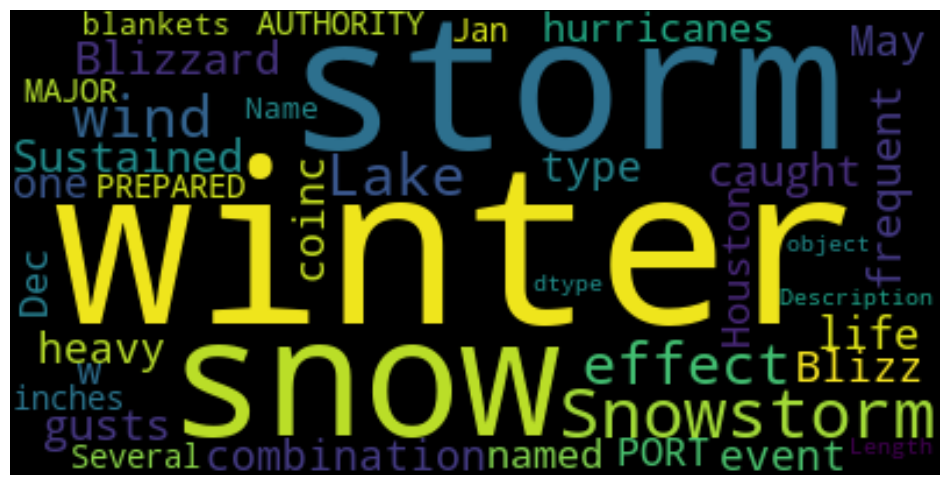

In [29]:
from wordcloud import WordCloud

# get descriptions from the dataframe, df, 
# and convert them to string
descriptions = str(df["Description"])

# Create a word cloud from descriptions
wordcloud = WordCloud().generate(descriptions)

# Visualize the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Perform the named entity recogmition on the descriptions.

In [37]:
import spacy
import en_core_web_sm 
# Load the pretrained statistical models for English
nlp = en_core_web_sm.load()

# Pass the descriptions to the pretrained statistical model
doc = nlp(descriptions)

# Display all the Named Entity Recognitions, NERs
if doc.ents: #if there are some entities, print them out
    for ent in doc.ents:
        print(f'{ent.text} : {ent.label_} - {spacy.explain(ent.label_)}')
else: # no name entities found
    print(f'I can not find any name entities!')

1      Blizzard: : QUANTITY - Measurements, as of weight or distance
2       : QUANTITY - Measurements, as of weight or distance
3       : QUANTITY - Measurements, as of weight or distance
4 : CARDINAL - Numerals that do not fall under another type
one : CARDINAL - Numerals that do not fall under another type
97 : CARDINAL - Numerals that do not fall under another type
May 23, 2023 : DATE - Absolute or relative dates or periods
Houston : GPE - Countries, cities, states
98 : CARDINAL - Numerals that do not fall under another type
99 : CARDINAL - Numerals that do not fall under another type
15, 2022 : DATE - Absolute or relative dates or periods
100 : CARDINAL - Numerals that do not fall under another type
101 : CARDINAL - Numerals that do not fall under another type
Jan 16, 2022 : DATE - Absolute or relative dates or periods
Several inches : QUANTITY - Measurements, as of weight or distance
Length : PERSON - People, including fictional
102 : CARDINAL - Numerals that do not fall under an